# Predicting Bank Term Deposit Subscriptions Using Machine Learning

## Preprocessing

### Dataset Loading and Basic Information

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

In [7]:
# Load dataset
data = pd.read_csv('Bank_data.csv', sep=';')

In [8]:
# Basic information
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
# Check for missing values and duplicates
print("\nMissing Values:\n", data.isnull().sum())
print("\nDuplicate Rows Count:", data.duplicated().sum())


Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Duplicate Rows Count: 0


In [10]:
# Summary statistics
print("\nNumerical Summary:\n", data.describe())
print("\nCategorical Summary:\n", data.describe(include=['object']))


Numerical Summary:
                 age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%   

## Exploratory Data Analysis

### EDA: Target Variable Distribution

In [12]:
# Setting up plot aesthetics
sns.set(style="whitegrid")

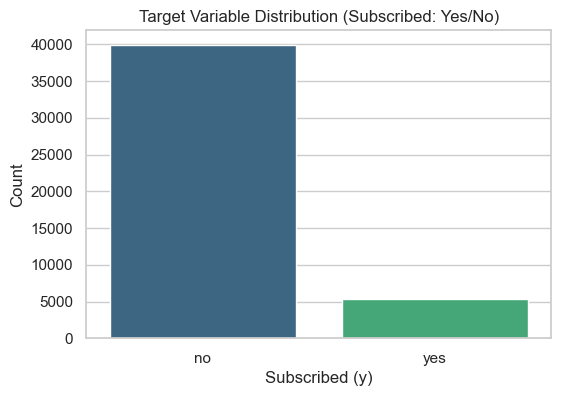

In [13]:
# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='y', palette='viridis')
plt.title('Target Variable Distribution (Subscribed: Yes/No)')
plt.xlabel('Subscribed (y)')
plt.ylabel('Count')
plt.show()

### EDA: Numerical Variable Distributions

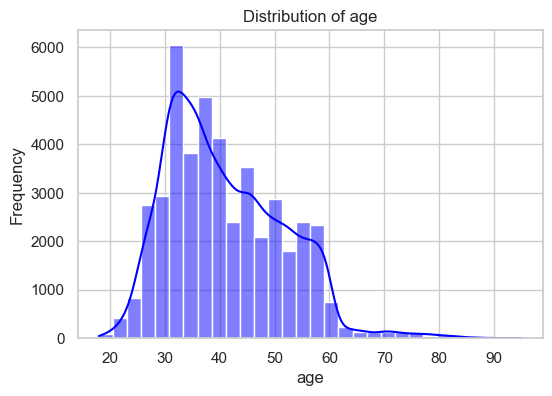

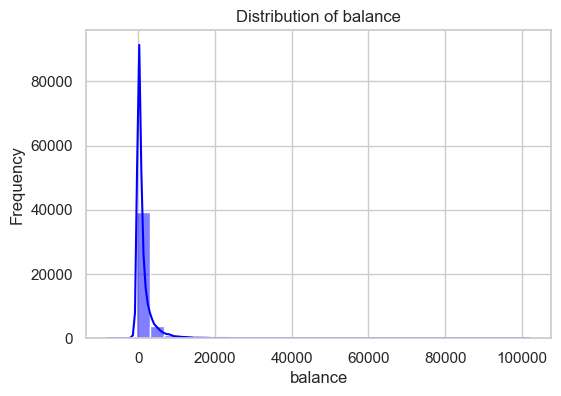

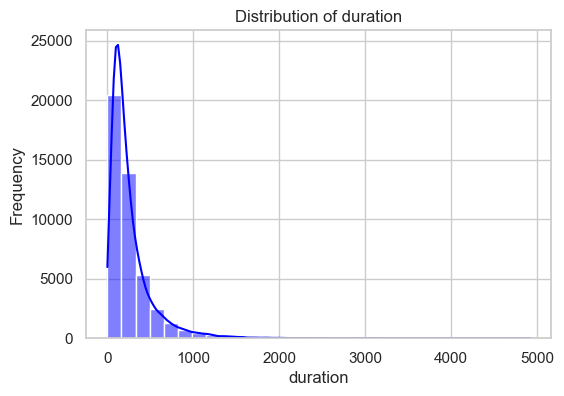

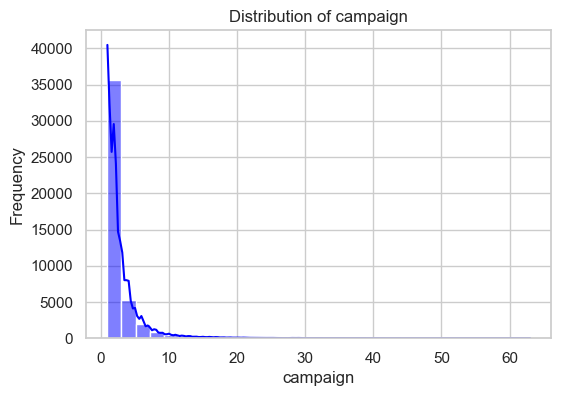

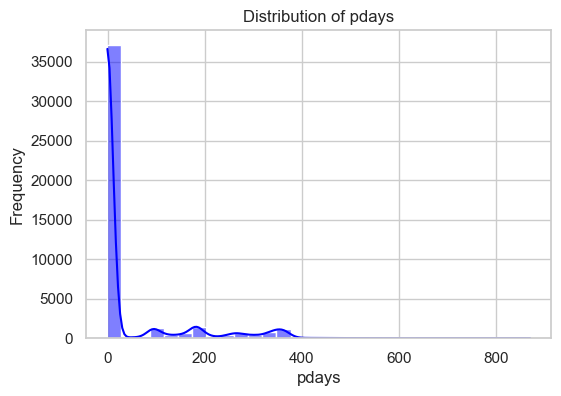

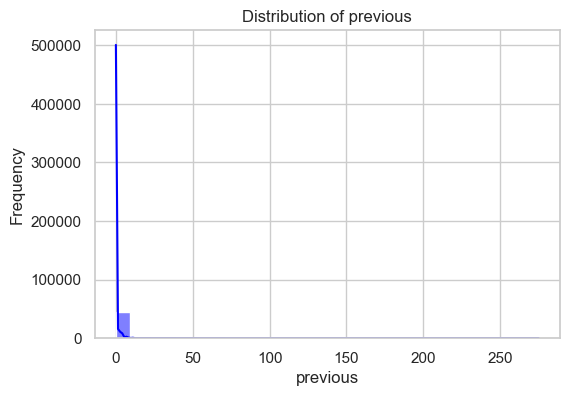

In [15]:
# Numerical variable distribution
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### EDA: Correlation Matrix

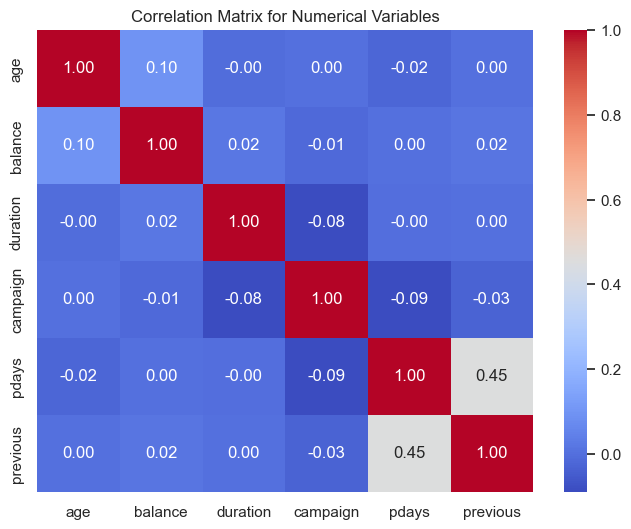

In [16]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

### EDA: Categorical Variable Distributions

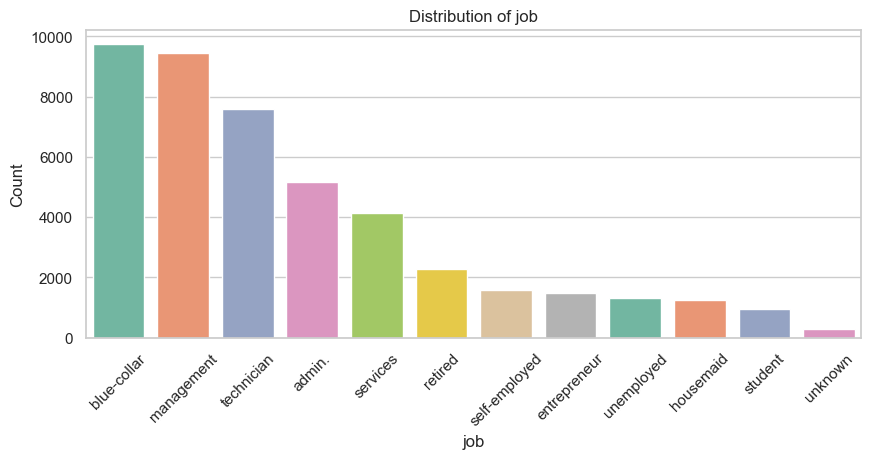

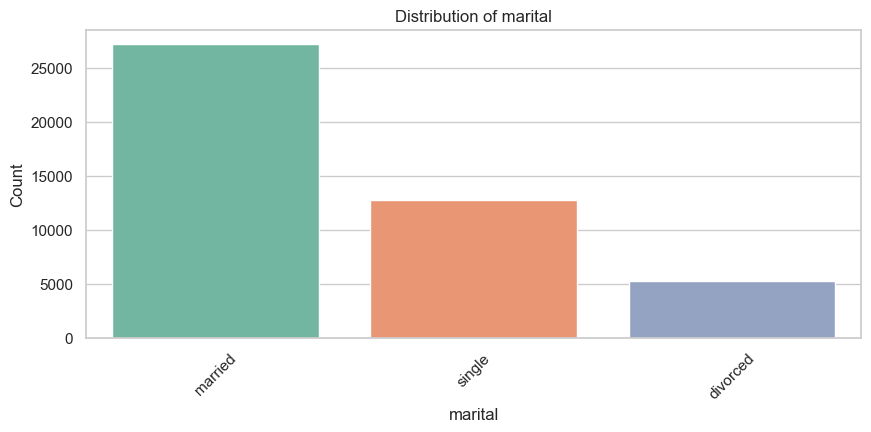

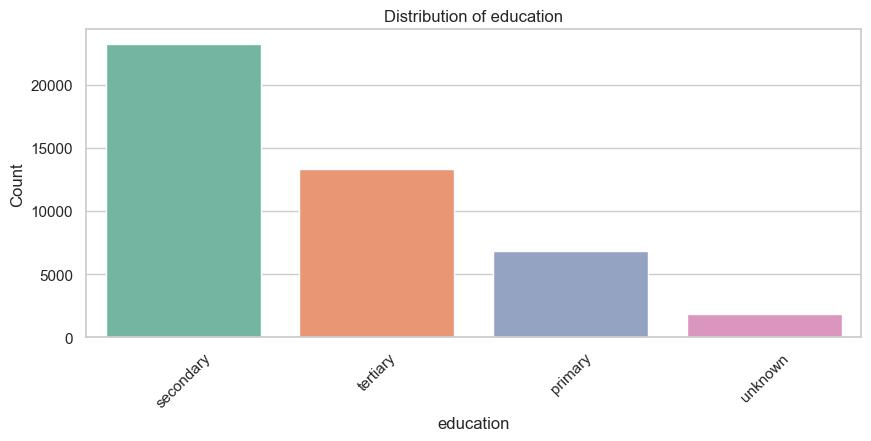

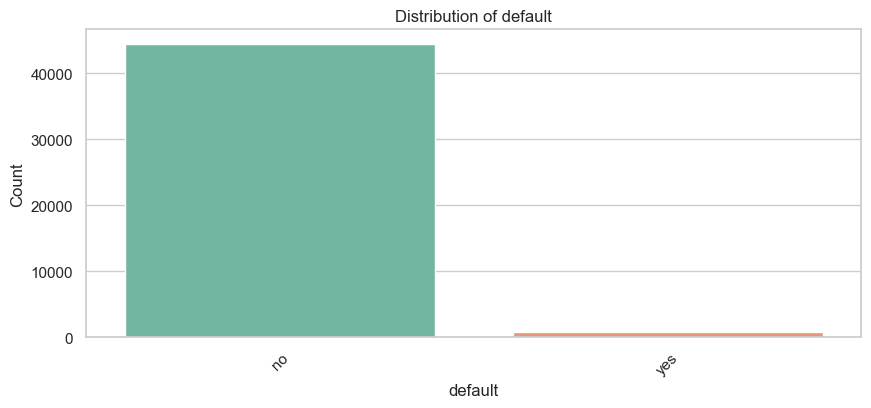

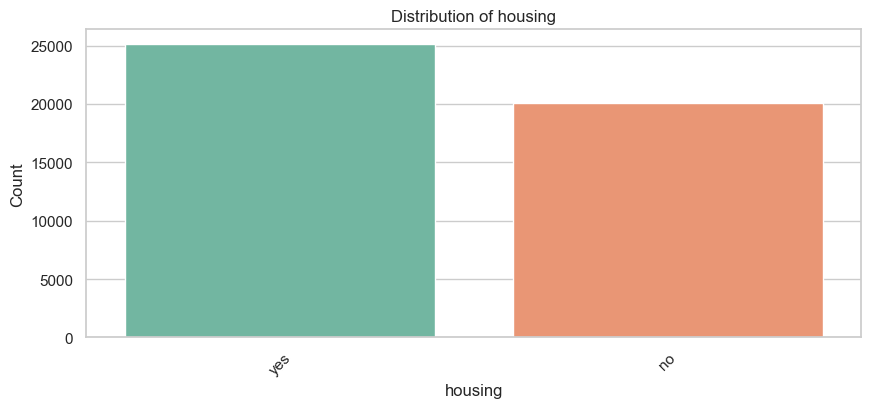

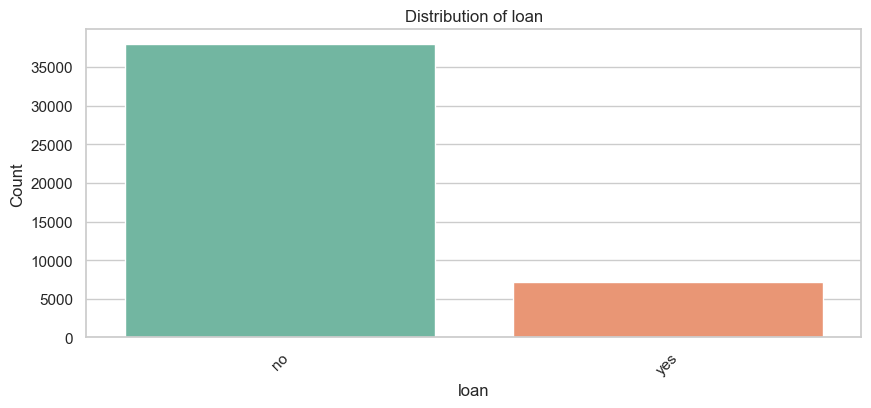

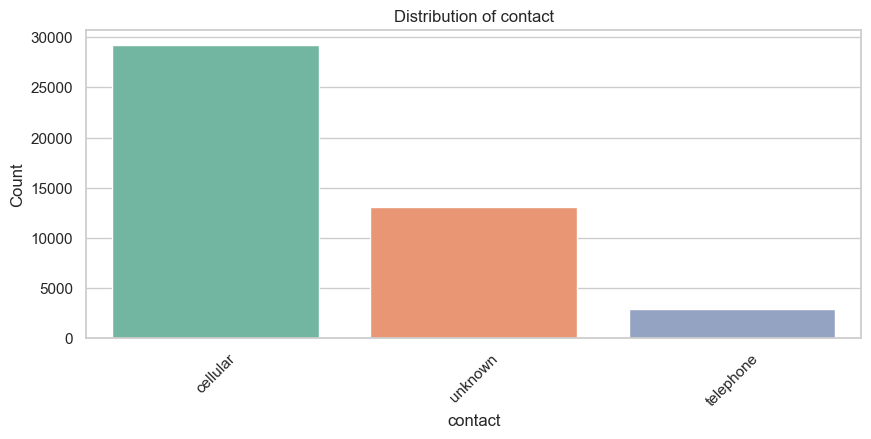

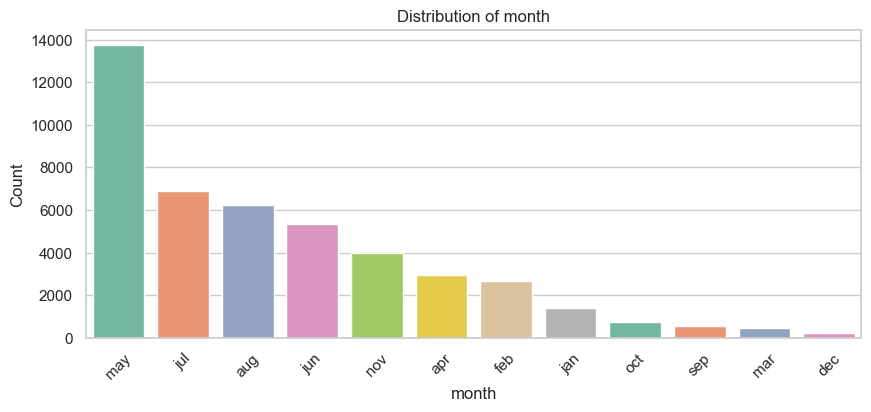

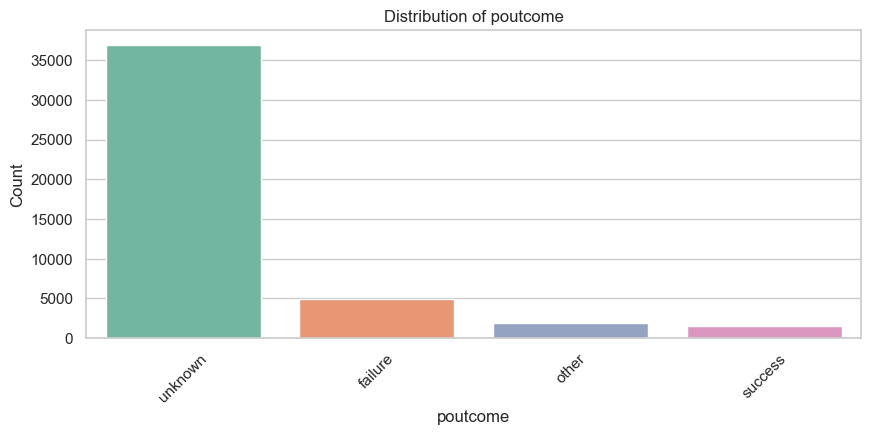

In [18]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=col, palette='Set2', order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

### Handling "Unknown" Values in Categorical Variables

In [20]:
# Replacing "unknown" with NaN for handling later
data.replace("unknown", pd.NA, inplace=True)

# Count of missing values after replacing "unknown"
print("\nMissing Values After Replacing 'unknown':\n", data.isna().sum())


Missing Values After Replacing 'unknown':
 age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


### Encoding Categorical Variables

In [21]:
# Encoding categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print("\nEncoded Data Preview:")
print(data_encoded.head())


Encoded Data Preview:
   age  balance  day  duration  campaign  pdays  previous   y  \
0   58     2143    5       261         1     -1         0  no   
1   44       29    5       151         1     -1         0  no   
2   33        2    5        76         1     -1         0  no   
3   47     1506    5        92         1     -1         0  no   
4   33        1    5       198         1     -1         0  no   

   job_blue-collar  job_entrepreneur  ...  month_jan  month_jul  month_jun  \
0            False             False  ...      False      False      False   
1            False             False  ...      False      False      False   
2            False              True  ...      False      False      False   
3             True             False  ...      False      False      False   
4            False             False  ...      False      False      False   

   month_mar  month_may  month_nov  month_oct  month_sep  poutcome_other  \
0      False       True      False      F

### Handling Imbalanced Classes

In [25]:
# Splitting the data into majority and minority classes
data_majority = data[data['y'] == 'no']
data_minority = data[data['y'] == 'yes']

# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                   replace=True,  # Sample with replacement
                                   n_samples=len(data_majority),  # Match majority count
                                   random_state=42)  # For reproducibility

# Combine majority and upsampled minority classes
data_balanced = pd.concat([data_majority, data_minority_upsampled])

# Verify class distribution
print("\nBalanced Data Target Variable Distribution:\n", data_balanced['y'].value_counts())


Balanced Data Target Variable Distribution:
 y
no     39922
yes    39922
Name: count, dtype: int64
